<a href="https://colab.research.google.com/github/NinjaDoMato/inteligencia-computacional/blob/master/Trabalho_4_Suicides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt
%matplotlib inline

import io

# Utilizar arquivo master.csv que esta no repositório do github, algumas colunas foram modificadas para que o algotimo funcionasse

from google.colab import files
uploaded = files.upload()

Using TensorFlow backend.


Saving master.csv to master.csv


In [0]:
dataset = pd.read_csv(io.BytesIO(uploaded['master.csv']), header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,country,Número do país,year,sex,NaN,age,NaN,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
1,Albania,1,1987,male,0.0,15-24 years,0.0,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
2,Albania,1,1987,male,0.0,35-54 years,1.0,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
3,Albania,1,1987,female,1.0,15-24 years,0.0,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
4,Albania,1,1987,male,0.0,75+ years,2.0,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation


In [0]:
X=dataset.iloc[1:,[1,2,4,6,7,8,13]]
y=dataset.iloc[1:,[6,13]].values

print(y)

[[0.0 '796']
 [1.0 '796']
 [0.0 '796']
 ...
 [5.0 '2309']
 [5.0 '2309']
 [4.0 '2309']]


In [0]:
from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
X= sc.fit_transform(X)
y= y.reshape(-1,1)
y=sc.fit_transform(y)

In [0]:
from keras.utils import to_categorical
output_category = to_categorical(y, num_classes=None)

print(X.shape)
print(y.shape)

(27820, 7)
(55640, 1)


In [0]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, output_category, test_size=0.3)

print(X_train.shape)
print(y_train.shape)
print(y_train)


ValueError: ignored

In [0]:
from keras import Sequential
from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=7, input_dim=7))
    regressor.add(Dense(units=2))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor

In [0]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=50,epochs=20)

In [0]:
results=regressor.fit(X_train,y_train)

y_pred= regressor.predict(X_test)
print(y_pred)

Epoch 1/20
19474/19474 [==============================] - 1s 38us/step - loss: 0.2881 - mean_absolute_error: 0.3599 - acc: 0.8248
Epoch 2/20
19474/19474 [==============================] - 0s 24us/step - loss: 0.0324 - mean_absolute_error: 0.1258 - acc: 0.9897
Epoch 3/20
19474/19474 [==============================] - 0s 24us/step - loss: 0.0148 - mean_absolute_error: 0.0619 - acc: 0.9897
Epoch 4/20
19474/19474 [==============================] - 0s 23us/step - loss: 0.0109 - mean_absolute_error: 0.0360 - acc: 0.9897
Epoch 5/20
19474/19474 [==============================] - 0s 22us/step - loss: 0.0101 - mean_absolute_error: 0.0289 - acc: 0.9897
Epoch 6/20
19474/19474 [==============================] - 0s 24us/step - loss: 0.0099 - mean_absolute_error: 0.0285 - acc: 0.9897
Epoch 7/20
19474/19474 [==============================] - 0s 24us/step - loss: 0.0098 - mean_absolute_error: 0.0286 - acc: 0.9897
Epoch 8/20
19474/19474 [==============================] - 0s 23us/step - loss: 0.0098 - me

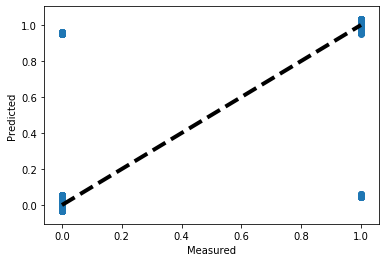

In [0]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()